In [30]:
%matplotlib inline
import pandas as pd
import seaborn as sbn

In [1]:
from bs4 import BeautifulSoup
import requests
import csv

In [2]:
t=requests.get("http://www.the-numbers.com/movie/records/All-Time-Domestic-Box-Office")

In [46]:
soup = BeautifulSoup(t.text)

/usr/local/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [6]:
allrows=soup.find_all('tr')

In [62]:
dictn = {'rank': [], 'ryear':[], 'title':[], 'DBO':[], 'IBO':[], 'WWBO':[]}
for arow in allrows[1:1+101-1]:
    tds = arow.find_all('td')
    rank = int(tds[0].text)
    year = int(tds[1].text)
    title = tds[2].text
    DBO = int(tds[3].text.strip('$').replace(',',''))
    IBO = int(tds[4].text.strip('$').replace(',',''))
    WWBO = int(tds[5].text.strip('$').replace(',',''))
    dictn['rank'].append(rank)
    dictn['ryear'].append(year)
    dictn['title'].append(title)
    dictn['DBO'].append(DBO)
    dictn['IBO'].append(IBO)
    dictn['WWBO'].append(WWBO)
                    

In [75]:
df=pd.DataFrame(dictn)

In [76]:
df.head(10)

,DBO,IBO,WWBO,rank,ryear,title
0,936662225,1122000000,2058662225,1,2015,Star Wars Ep. VII: The Force Awakens
1,760507625,2023411357,2783918982,2,2009,Avatar
2,658672302,1548943366,2207615668,3,1997,Titanic
3,652198010,1018130015,1670328025,4,2015,Jurassic World
4,623279547,896200000,1519479547,5,2012,The Avengers
5,533345358,469546000,1002891358,6,2008,The Dark Knight
6,483597782,467000000,950597782,7,2016,Finding Dory
7,474544677,552500000,1027044677,8,1999,Star Wars Ep. I: The Phantom Menace
8,460998007,325600000,786598007,9,1977,Star Wars Ep. IV: A New Hope
9,459005868,945700000,1404705868,10,2015,Avengers: Age of Ultron


In [70]:
%sql postgresql://beyeas01:@localhost/world

'Connected: beyeas01@world'

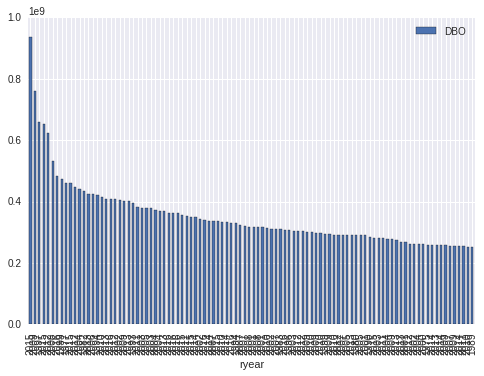

In [82]:
df.plot(x = "ryear", y = "DBO", kind = "bar")


In [89]:
df.to_csv('boxoffice.csv')